In [136]:
import pandas as pd

In [137]:
import numpy as np
import matplotlib.pyplot as plt


#1. Data Exploration:


a. Load the dataset and perform exploratory data analysis (EDA).

In [138]:
LR=pd.read_csv('Titanic_train.csv')
LR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [139]:
LR.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
LR.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
Numeric_data=LR.select_dtypes(include=['int64','float64'])
Numeric_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [143]:
LR.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [144]:
LR.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


b. Examine the features, their types, and summary statistics.

In [145]:
numerical_summary = LR.describe()
feature_types = LR.dtypes

print("Summary Statistics for Numerical Features:")
print(numerical_summary)

print("\nFeature Types:")
print(feature_types)


Summary Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Feature Types:
PassengerId      int64

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [146]:
LR.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

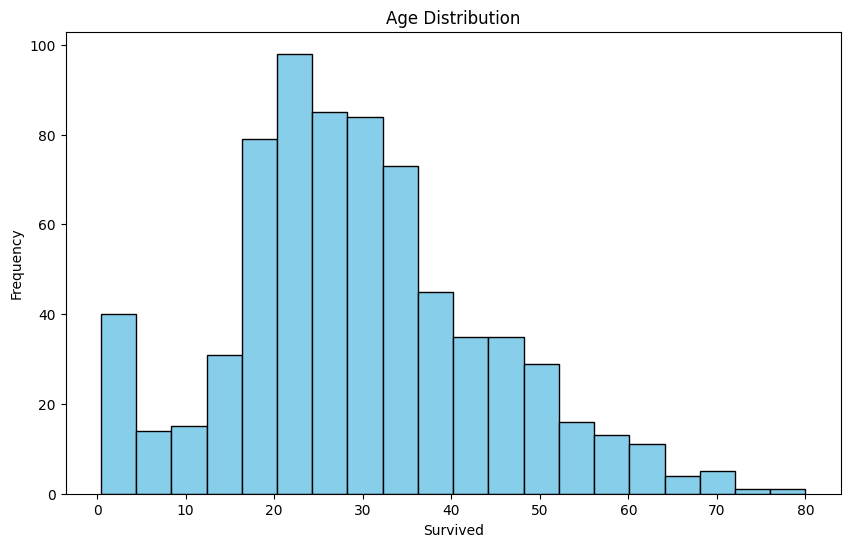

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(LR['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()
#we can observe passengers age& where the maxium age criteria faals in.

Text(0, 0.5, 'Fare')

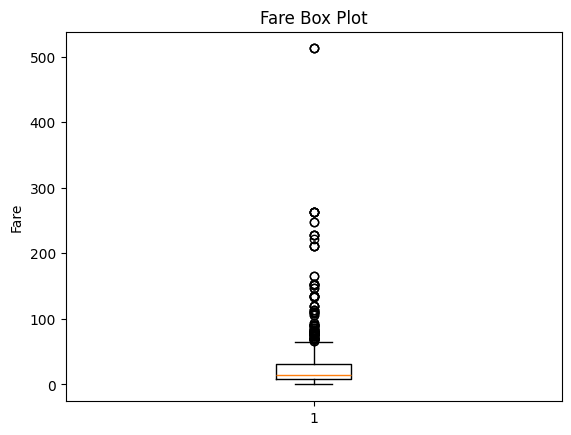

In [148]:
plt.boxplot(LR['Fare'])
plt.title('Fare Box Plot')
plt.ylabel('Fare')
# we can observe 512.329200 outlier in the fare ,which differentiate with passengers ticket,
# in which class there are travelling

#2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

In [149]:
LR.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [150]:
LR['Age'].fillna(LR['Age'].median(), inplace=True)
LR['Cabin'].fillna(LR['Cabin'].mode()[0], inplace=True)
LR['Embarked'].fillna(LR['Embarked'].mode()[0],inplace=True)

<ipython-input-150-8ca322f7e509>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  LR['Age'].fillna(LR['Age'].median(), inplace=True)
<ipython-input-150-8ca322f7e509>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [151]:
LR.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


b. Encode categorical variables.

In [152]:
LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
Encoded_data=pd.get_dummies(LR,columns=['Sex','Embarked','Name','Ticket','Cabin'])
Encoded_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,22.0,1,0,7.2500,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,19.0,0,0,30.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,28.0,1,2,23.4500,True,False,False,...,False,False,False,False,False,False,False,False,False,False
889,890,1,1,26.0,0,0,30.0000,False,True,True,...,False,False,False,False,False,False,False,False,False,False


#3. Model Building:

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [155]:
target=Encoded_data['Survived']
features=Encoded_data.drop('Survived',axis=1)

In [156]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=100)

In [157]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 1730)
(179, 1730)
(712,)
(179,)


In [158]:
log_model= LogisticRegression()
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
y_pred= log_model.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred)

0.7932960893854749

In [161]:
y_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1])

In [162]:
log_model.predict_proba(x_test)

array([[0.03944949, 0.96055051],
       [0.41099844, 0.58900156],
       [0.93039929, 0.06960071],
       [0.43127807, 0.56872193],
       [0.90912837, 0.09087163],
       [0.19342013, 0.80657987],
       [0.93218881, 0.06781119],
       [0.89572572, 0.10427428],
       [0.0323802 , 0.9676198 ],
       [0.69156349, 0.30843651],
       [0.01025942, 0.98974058],
       [0.895457  , 0.104543  ],
       [0.90108427, 0.09891573],
       [0.58729042, 0.41270958],
       [0.34320947, 0.65679053],
       [0.84277381, 0.15722619],
       [0.09488705, 0.90511295],
       [0.36213473, 0.63786527],
       [0.58794529, 0.41205471],
       [0.89103742, 0.10896258],
       [0.93101061, 0.06898939],
       [0.02092801, 0.97907199],
       [0.87745197, 0.12254803],
       [0.26127063, 0.73872937],
       [0.92443696, 0.07556304],
       [0.92957595, 0.07042405],
       [0.25704624, 0.74295376],
       [0.92591754, 0.07408246],
       [0.95222214, 0.04777786],
       [0.94608513, 0.05391487],
       [0.

*4. Model Evaluation:*

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [164]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")

Accuracy: 0.7932960893854749
Precision: 0.796875
Recall: 0.68
F1-score: 0.7338129496402878
ROC-AUC score: 0.7775000000000001


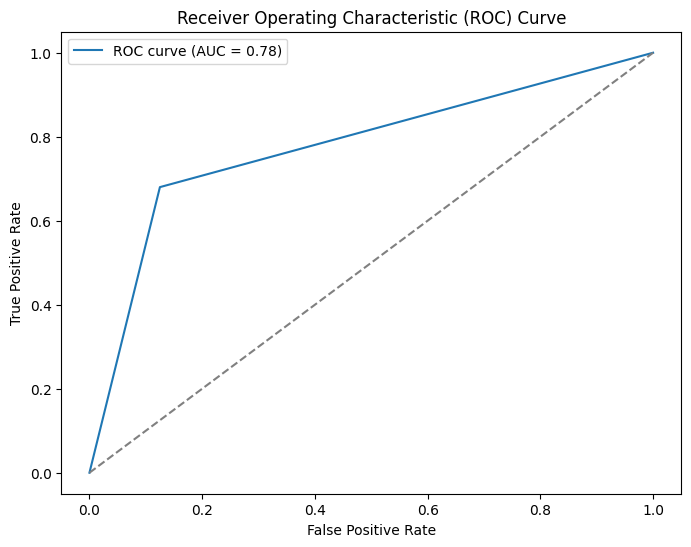

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

#5. Interpretation:*

a. Interpret the coefficients of the logistic regression model..


In [166]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': log_model.coef_[0]})
print(coefficients)

          Feature  Coefficient
0     PassengerId    -0.000247
1          Pclass    -1.055477
2             Age    -0.064153
3           SibSp    -0.319130
4           Parch    -0.201403
...           ...          ...
1725    Cabin_F33     0.265858
1726    Cabin_F38    -0.066260
1727     Cabin_F4     0.348246
1728     Cabin_G6    -0.084740
1729      Cabin_T    -0.093926

[1730 rows x 2 columns]


In [167]:
LR.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

b. Discuss the significance of features in predicting the target variable (survival probability in this case)

In [168]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': log_model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(10))

                Feature  Coefficient
6            Sex_female     2.999525
8            Embarked_C     1.601363
1630      Cabin_B96 B98    -1.320355
10           Embarked_S     1.075169
1                Pclass    -1.055477
982         Ticket_1601     1.036850
1235      Ticket_347082    -0.805633
1139       Ticket_29106     0.719415
1091        Ticket_2661     0.620022
1464  Ticket_C.A. 37671     0.611470


The analysis of feature significance provides valuable insights that can be used in various ways:

1.Understanding the Data

2.Model Improvement

3.Decision Making

4.Feature Engineering